In [6]:
import xarray as xr # Basic package to deal with data arrays
import xarray_sentinel # Handles most basic SAR operations
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

In [31]:
scenes = [# "S1A_IW_GRDH_1SDV_20231001T180259_20231001T180324_050575_06179D_1251",
          "S1A_IW_GRDH_1SDV_20231013T180259_20231013T180324_050750_061D9E_33DA", 
          "S1A_IW_GRDH_1SDV_20240901T180254_20240901T180319_055475_06C483_C134", 
          "S1A_IW_GRDH_1SDV_20241007T180256_20241007T180321_056000_06D943_D46B", 
          "S1A_IW_GRDH_1SDV_20241019T180256_20241019T180321_056175_06E02E_2D52", 
          "S1A_IW_GRDH_1SDV_20241031T180256_20241031T180321_056350_06E71E_479F", 
          "S1A_IW_GRDH_1SDV_20241112T180255_20241112T180320_056525_06EE16_DC29", 
          "S1A_IW_GRDH_1SDV_20241124T180254_20241124T180319_056700_06F516_BA27", 
          "S1A_IW_GRDH_1SDV_20241206T180253_20241206T180318_056875_06FBFD_25AD", 
          "S1A_IW_GRDH_1SDV_20241218T180252_20241218T180317_057050_0702F2_0BC2", 
          "S1A_IW_GRDH_1SDV_20241230T180251_20241230T180316_057225_0709DD_15AC", 
          "S1A_IW_GRDH_1SDV_20250111T180250_20250111T180315_057400_0710C7_ADBB", 
          "S1A_IW_GRDH_1SDV_20250123T180249_20250123T180314_057575_0717B9_A784", 
          "S1A_IW_GRDH_1SDV_20250204T180249_20250204T180314_057750_071EA2_4373", 
          "S1A_IW_GRDH_1SDV_20250216T180248_20250216T180313_057925_0725AE_8AC7", 
          # "S1A_IW_GRDH_1SDV_20250228T180248_20250228T180313_058100_072CD1_AFFA", 
          "S1A_IW_GRDH_1SDV_20250312T180248_20250312T180313_058275_0733E6_4F5B", 
          "S1A_IW_GRDH_1SDV_20250324T180248_20250324T180313_058450_073AD0_04B7", 
          "S1A_IW_GRDH_1SDV_20250405T180249_20250405T180314_058625_0741EA_248B", 
          "S1A_IW_GRDH_1SDV_20250417T180249_20250417T180314_058800_07490E_F868", 
          # "S1A_IW_GRDH_1SDV_20250429T180249_20250429T180314_058975_07503A_10EA", 
          # "S1A_IW_GRDH_1SDV_20250511T180249_20250511T180314_059150_0756D0_E613"
          ]

In [ ]:
zarr_paths = []
# zarr_paths = sorted(glob.glob("/Users/devseed/Documents/repos/eopf-cpm/02_zarr_converted/*.zarr"))
for scene in scenes:
    zarr_paths.append(f"https://objects.eodc.eu/e05ab01a9d56408d82ac32d69a5aae2a:notebook-data/tutorial_data/cpm_v260/{scene}.zarr")
datatrees = [xr.open_datatree(path, consolidated=True) for path in zarr_paths]

DATASET_NUMBER = 18 

# To check for ID number of datatrees
# datatrees[1].groups
MEASUREMENTS_VH_GROUP_ID = 4
MEASUREMENTS_VV_GROUP_ID = 7
GCP_VH_GROUP_ID = 14
GCP_VV_GROUP_ID = 28
CALIBRATION_VH_GROUP_ID = 19
CALIBRATION_VV_GROUP_ID = 33

WATER_THRESHOLD_DB = -15
OTHER_THRESHOLD_DB = -20

target_lat = 39.37
target_lon = -0.34

In [33]:
# Create measurements list VV
i = 0
measurementsVV = []
while i < DATASET_NUMBER:
    measurementsVV.append(datatrees[i][datatrees[i].groups[MEASUREMENTS_VV_GROUP_ID]].to_dataset())
    i = i + 1

In [34]:
# Create measurements list VH
i = 0
measurementsVH = []
while i < DATASET_NUMBER:
    measurementsVH.append(datatrees[i][datatrees[i].groups[MEASUREMENTS_VH_GROUP_ID]].to_dataset())
    i = i + 1

In [35]:
# Create decimated grd list VV for the whole product
grddecimatedVV = []
for i in range(DATASET_NUMBER):
    da = measurementsVV[i].grd
    az_len = da.sizes['azimuth_time']
    gr_len = da.sizes['ground_range']
    
    grddecimatedVV.append(da.isel(
        azimuth_time=slice(None, None, 10),
        ground_range=slice(None, None, 10)
    ))

In [38]:
# Create decimated grd list VH for the whole product
grddecimatedVH = []
for i in range(DATASET_NUMBER):
    da = measurementsVH[i].grd
    az_len = da.sizes['azimuth_time']
    gr_len = da.sizes['ground_range']
    
    grddecimatedVH.append(da.isel(
        azimuth_time=slice(None, None, 10),
        ground_range=slice(None, None, 10)
    ))

In [39]:
# Create decimated grd list VV
grdVV = []
for i in range(DATASET_NUMBER):
    da = measurementsVV[i].grd
    az_len = da.sizes['azimuth_time']
    gr_len = da.sizes['ground_range']
    
    grdVV.append(da.isel(
        azimuth_time=slice(max(0, az_len - 10000), az_len, 5),
        ground_range=slice(max(0, gr_len - 10000), gr_len, 5)
    ))

In [40]:
# Create decimated grd list VH
grdVH = []
for i in range(DATASET_NUMBER):
    da = measurementsVH[i].grd
    az_len = da.sizes['azimuth_time']
    gr_len = da.sizes['ground_range']
    
    grdVH.append(da.isel(
        azimuth_time=slice(max(0, az_len - 10000), az_len, 5),
        ground_range=slice(max(0, gr_len - 10000), gr_len, 5)
    ))

In [41]:
# set(dat.ground_range.shape for dat in measurementsVV) # to see if all measurements have the same shape - they don't have
# set(dat.ground_range.shape for dat in grdVV) # to see if all grd have the same shape - they have

In [42]:
# Create GCP (interpolated with decimated grd) list VV
i = 0
gcpVV = []
while i < DATASET_NUMBER:
    gcpVV.append(datatrees[i][datatrees[i].groups[GCP_VV_GROUP_ID]].to_dataset())
    gcpVV[i] = gcpVV[i].interp_like(grdVV[i])
    i = i + 1

In [43]:
# Create GCP (interpolated with decimated grd) list VH
i = 0
gcpVH = []
while i < DATASET_NUMBER:
    gcpVH.append(datatrees[i][datatrees[i].groups[GCP_VH_GROUP_ID]].to_dataset())
    gcpVH[i] = gcpVH[i].interp_like(grdVH[i])
    i = i + 1

In [46]:
# Assinging lat and long coordinates to grd VV
i = 0
while i < DATASET_NUMBER:
    grdVV[i] = grdVV[i].assign_coords({"latitude": gcpVV[i].latitude, 
                                   "longitude": gcpVV[i].longitude})
    i = i + 1

In [47]:
# Assinging lat and long coordinates to grd VH
i = 0
while i < DATASET_NUMBER:
    grdVH[i] = grdVH[i].assign_coords({"latitude": gcpVH[i].latitude, 
                                   "longitude": gcpVH[i].longitude})
    i = i + 1

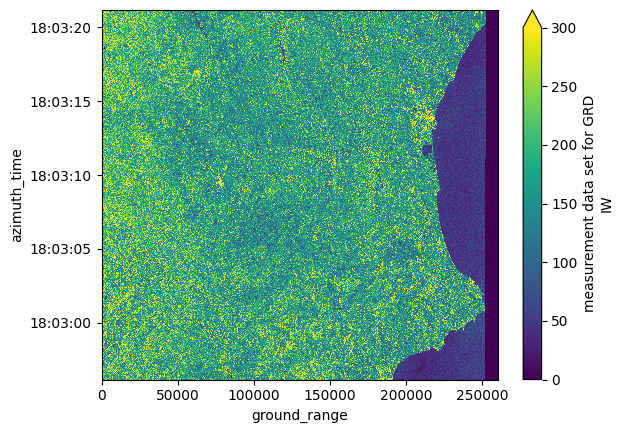

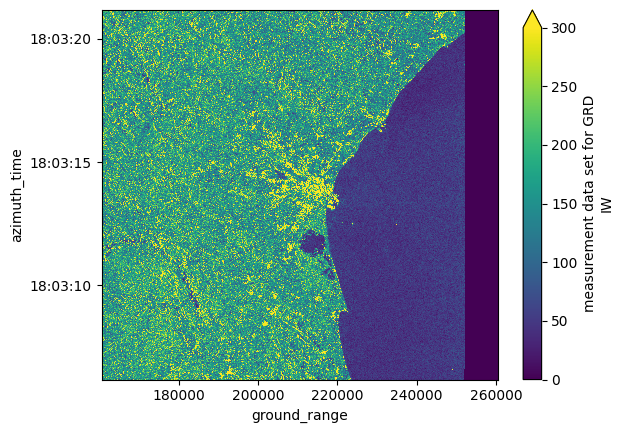

In [58]:
# Difference between decimated grd VV (only for AOI) and VV (whole scene)
for i in [grddecimatedVV[3], grdVV[3]]:
    i.plot(vmax=300)
    # i.plot(x="longitude", y="latitude", vmax=300)
    plt.show()

In [50]:
# Create calibration list VV
i = 0
calibrationVV = []
while i < DATASET_NUMBER:
    calibrationVV.append(datatrees[i][datatrees[i].groups[CALIBRATION_VV_GROUP_ID]].to_dataset())
    gcpVV[i] = gcpVV[i].interp_like(grdVV[i])
    i = i + 1

In [51]:
# Create calibration list VH
i = 0
calibrationVH = []
while i < DATASET_NUMBER:
    calibrationVH.append(datatrees[i][datatrees[i].groups[CALIBRATION_VH_GROUP_ID]].to_dataset())
    gcpVH[i] = gcpVH[i].interp_like(grdVH[i])
    i = i + 1

In [52]:
# Calibrate intensity for each product VV
i = 0
intensityVV = []
while i < DATASET_NUMBER:
    intensityVV.append(xarray_sentinel.calibrate_intensity(
        grdVV[i], 
        calibrationVV[i].beta_nought, 
        as_db=True))
    i = i + 1


/Users/devseed/Documents/repos/eopf-101/.venv/lib/python3.13/site-packages/xarray/computation/apply_ufunc.py:813: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/devseed/Documents/repos/eopf-101/.venv/lib/python3.13/site-packages/xarray/computation/apply_ufunc.py:813: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/devseed/Documents/repos/eopf-101/.venv/lib/python3.13/site-packages/xarray/computation/apply_ufunc.py:813: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/devseed/Documents/repos/eopf-101/.venv/lib/python3.13/site-packages/xarray/computation/apply_ufunc.py:813: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/devseed/Documents/repos/eopf-101/.venv/lib/python3.13/site-packages/xarray/computation/apply_ufunc.py:813: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


In [53]:
# Calibrate intensity for each product VH
i = 0
intensityVH = []
while i < DATASET_NUMBER:
    intensityVH.append(xarray_sentinel.calibrate_intensity(
        grdVH[i], 
        calibrationVH[i].beta_nought, 
        as_db=True))
    i = i + 1


/Users/devseed/Documents/repos/eopf-101/.venv/lib/python3.13/site-packages/xarray/computation/apply_ufunc.py:813: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/devseed/Documents/repos/eopf-101/.venv/lib/python3.13/site-packages/xarray/computation/apply_ufunc.py:813: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/devseed/Documents/repos/eopf-101/.venv/lib/python3.13/site-packages/xarray/computation/apply_ufunc.py:813: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/devseed/Documents/repos/eopf-101/.venv/lib/python3.13/site-packages/xarray/computation/apply_ufunc.py:813: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/Users/devseed/Documents/repos/eopf-101/.venv/lib/python3.13/site-packages/xarray/computation/apply_ufunc.py:813: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


In [54]:
# Calibrate amplitude for each product VV
i = 0
amplitudeVV = []
while i < DATASET_NUMBER:
    amplitudeVV.append(xarray_sentinel.calibrate_amplitude(
        grdVV[i], 
        calibrationVV[i].beta_nought))
    i = i + 1

In [55]:
# Calibrate amplitude for each product VH
i = 0
amplitudeVH = []
while i < DATASET_NUMBER:
    amplitudeVH.append(xarray_sentinel.calibrate_amplitude(
        grdVH[i], 
        calibrationVH[i].beta_nought))
    i = i + 1

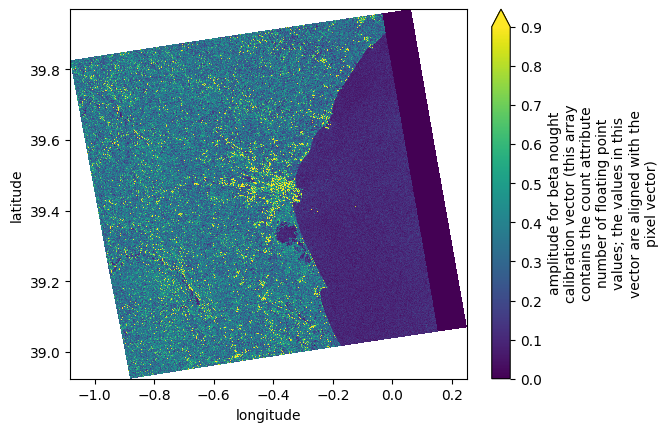

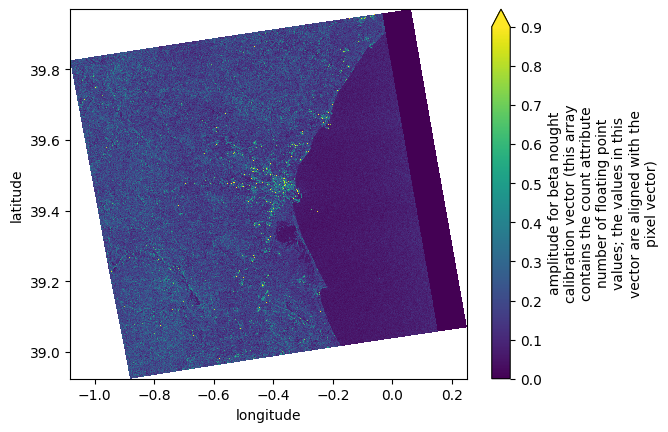

In [60]:
for i in [amplitudeVV[3], amplitudeVH[3]]:
    #i.plot(vmax=300)
    i.plot(x="longitude", y="latitude", vmax=0.9)
    plt.show()

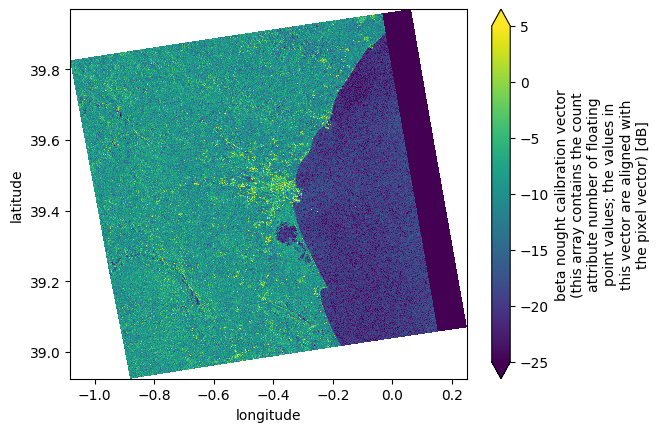

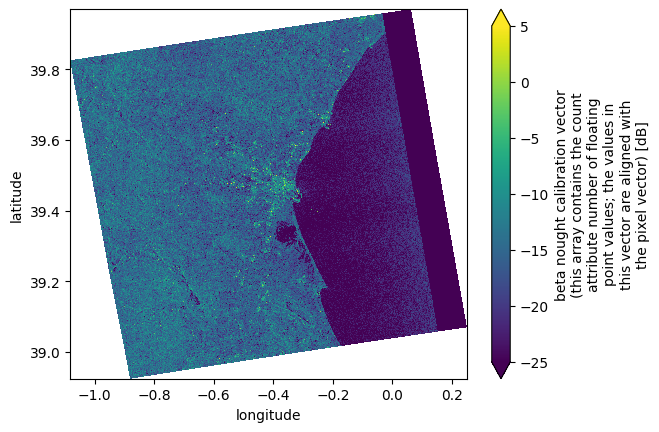

In [61]:
for i in [intensityVV[3], intensityVH[3]]:
    #i.plot(vmax=300)
    i.plot(x="longitude", y="latitude", vmin=-25, vmax=5)
    plt.show()

In [ ]:
# ndwi = (amplitudeVV[4] - amplitudeVH[4])/(amplitudeVV[4] + amplitudeVH[4]) # ~ ndwi amplitude
# ndwi = (intensityVV[4] - intensityVH[4])/(intensityVV[4] + intensityVH[4]) # ~ ndwi intensity
ndwi = intensityVV[4]/intensityVH[4] # intensity ratio

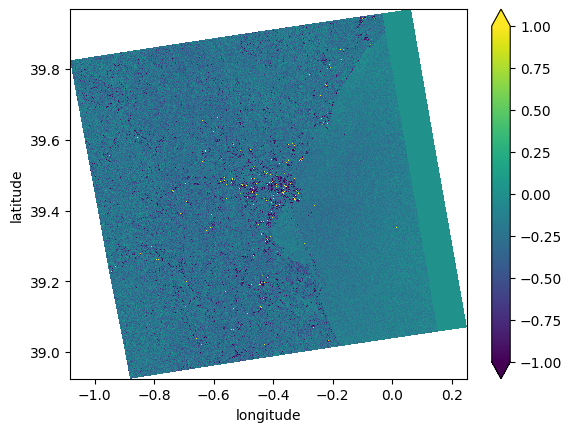

In [64]:
# ndwi.plot(x="longitude", y="latitude", vmin=-1, vmax=2) # amplitude
# ndwi.plot(x="longitude", y="latitude", vmin=-1, vmax=0.5) # intensity
ndwi.plot(x="longitude", y="latitude", vmin=-1, vmax=1) # intensity ratio
plt.show()

In [65]:
# water_mask_after = (intensity[4] <= WATER_THRESHOLD_DB) & (intensity[4] >= OTHER_THRESHOLD_DB)
# water_mask_before = (intensity[3] <= WATER_THRESHOLD_DB) & (intensity[3] >= OTHER_THRESHOLD_DB)

water_mask_before = (intensityVV[3] <= WATER_THRESHOLD_DB) 
water_mask_after = (intensityVV[4] <= WATER_THRESHOLD_DB) 
outro = (intensityVV[6] <= WATER_THRESHOLD_DB) 

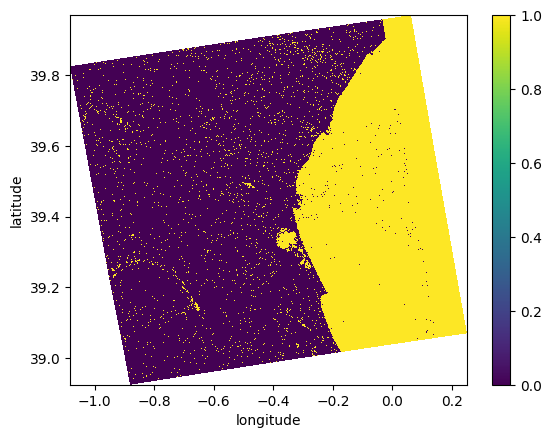

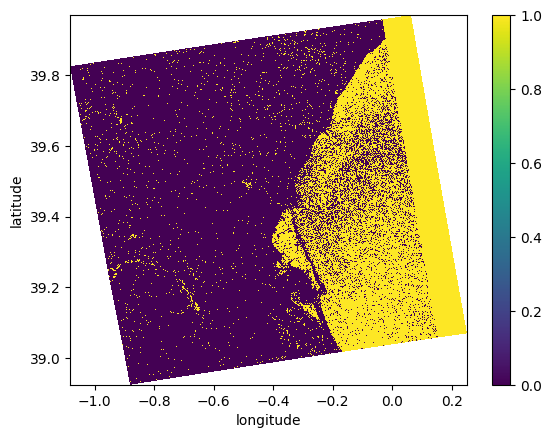

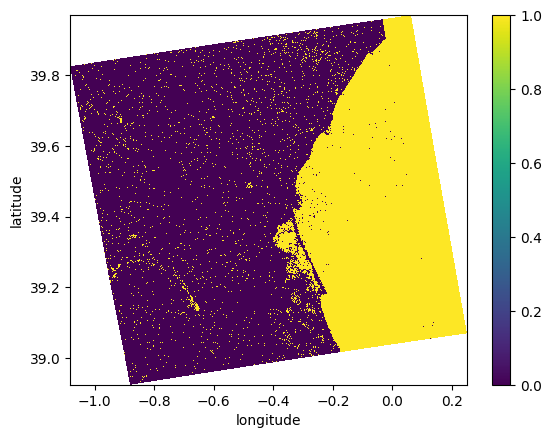

In [66]:
for i in [water_mask_before, water_mask_after, outro]:
    #i.plot(vmax=300)
    i.plot(x="longitude", y="latitude")
    plt.show()

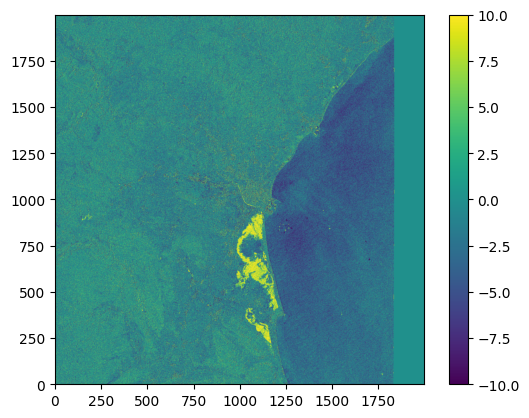

In [68]:
dif = (intensityVV[3].values-intensityVV[4].values)  
plt.imshow(dif, vmin=-10, vmax=10)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()


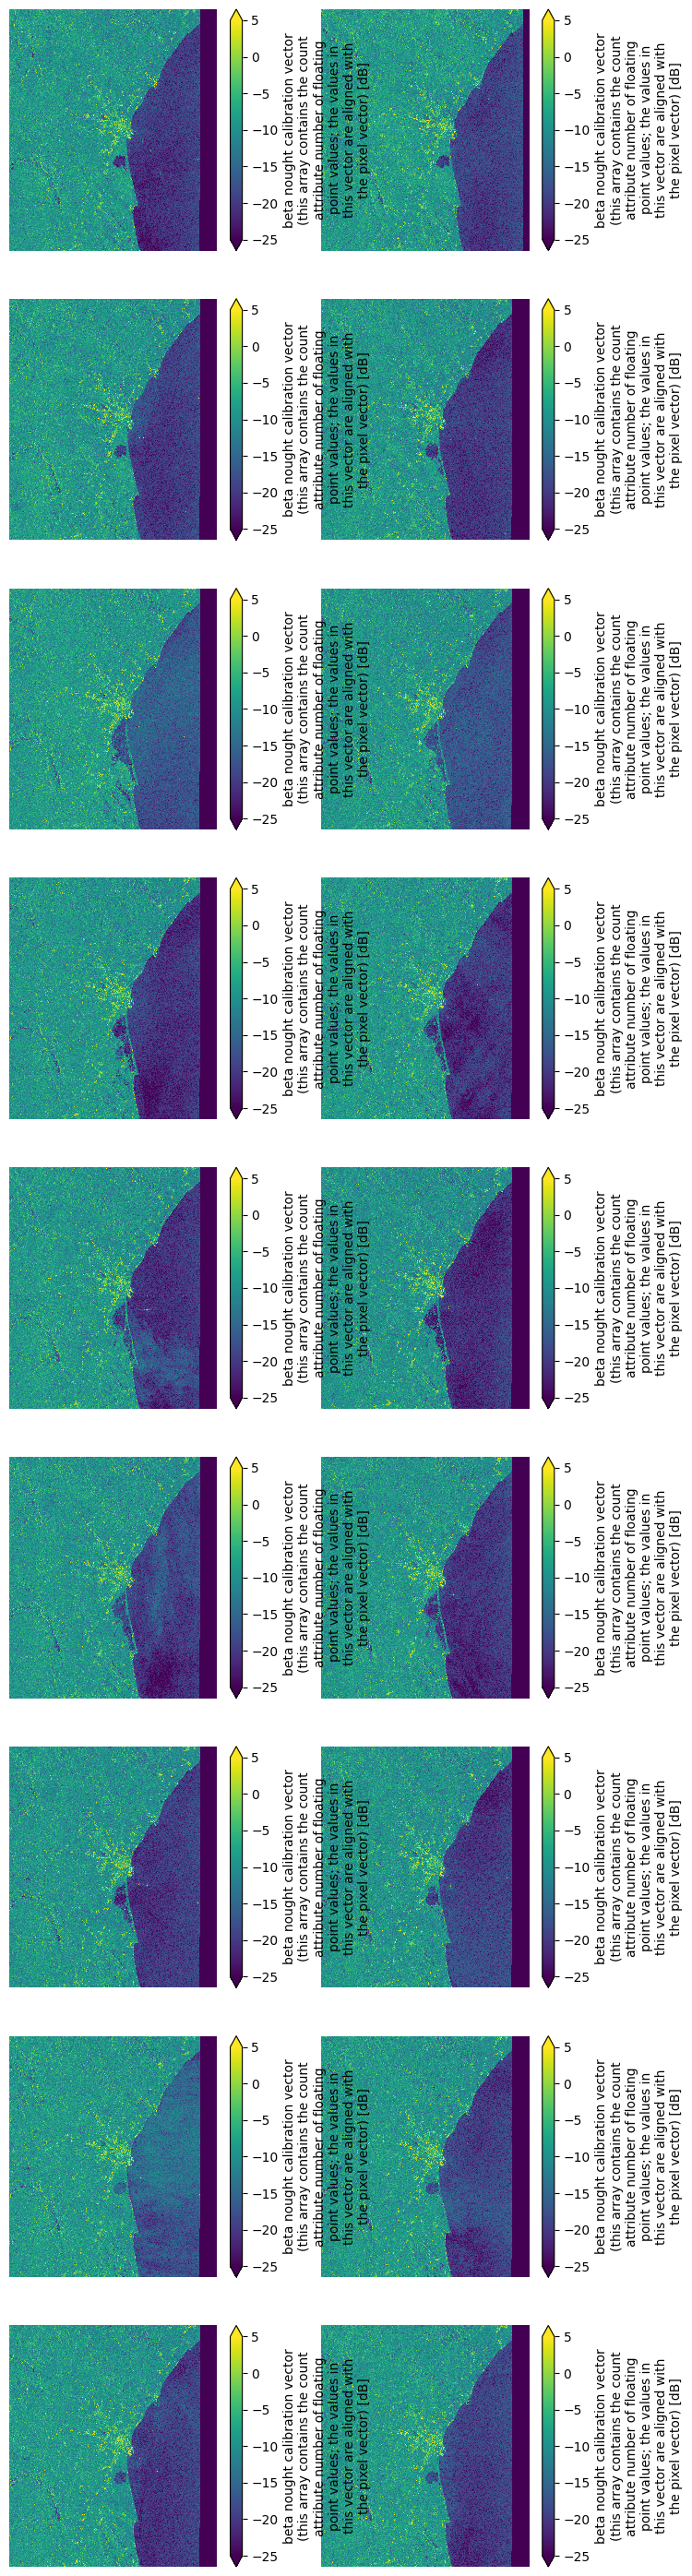

In [69]:
n_images = len(intensityVV)
n_cols = 2
n_rows = (n_images + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < n_images:
        intensityVV[i].plot(ax=ax, vmin=-25, vmax=5)
        ax.axis('off')


plt.show()


In [70]:
abs_error = np.abs(intensityVV[3].latitude - target_lat) + np.abs(intensityVV[3].longitude - target_lon)

i, j = np.unravel_index(np.argmin(abs_error.values), abs_error.shape)

azimuth_time_value = intensityVV[1].azimuth_time[i].values
ground_range_value = intensityVV[1].ground_range[j].values
azimuth_time_index = i
ground_range_index = j

print("Nearest azimuth_time:", azimuth_time_value, ", with index:", azimuth_time_index)
print("Nearest ground_range:", ground_range_value, ", with index:", ground_range_index)


Nearest azimuth_time: 2024-09-01T18:03:10.913945890 , with index: 809
Nearest ground_range: 210470.0 , with index: 1104


/Users/devseed/Documents/repos/eopf-101/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


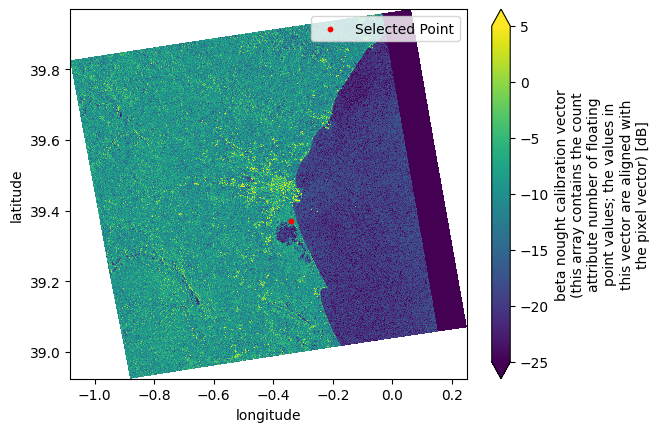

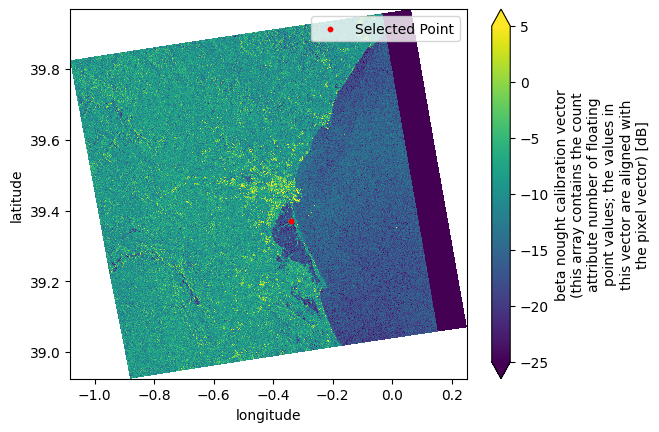

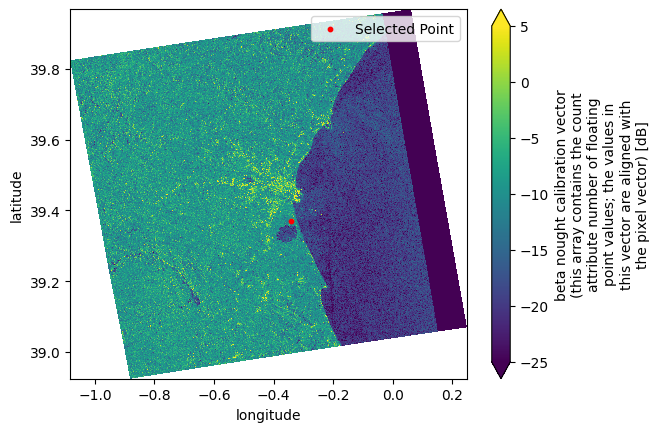

In [71]:
for i in [intensityVV[3], intensityVV[4], intensityVV[16]]:
    i.plot(
    x="longitude", 
    y="latitude", 
    vmin=-25, vmax=5
    )

    plt.scatter(
        target_lon, target_lat, 
        color="red", marker="o", s=10, 
        label="Selected Point"
    )

    plt.legend()
    plt.show()

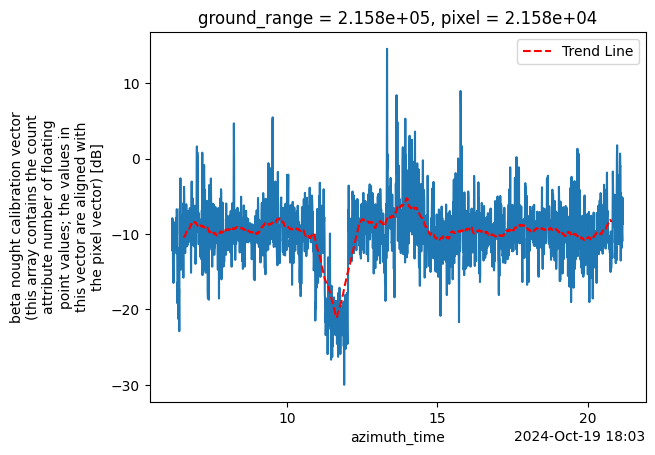

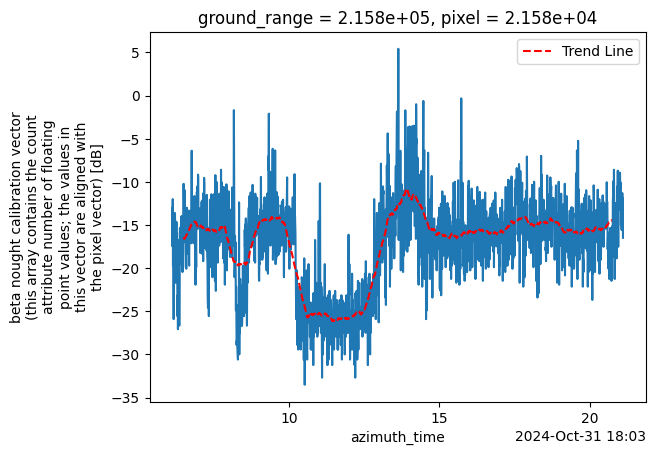

In [72]:
smoothness = 100
for i in [intensityVV[3].isel(ground_range=ground_range_index), 
          intensityVH[4].isel(ground_range=ground_range_index)]:
    i.plot()
    x = i[i.dims[0]].values
    y = i.values

    trend = pd.Series(y).rolling(window=smoothness, center=True).mean()

    plt.plot(x, trend, color='red', linestyle='--', label='Trend Line')
    plt.legend()
    plt.show()

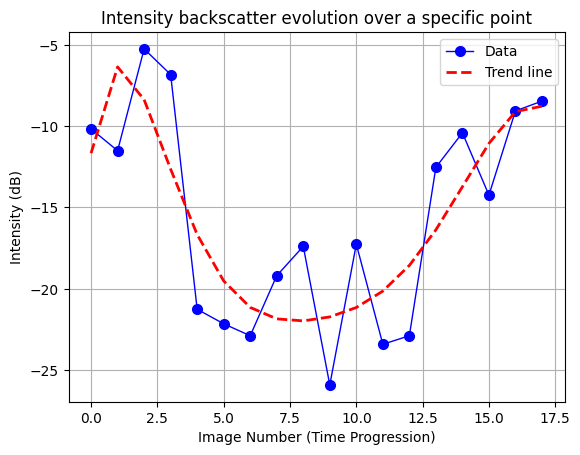

In [73]:
intensity_values = []
for img in intensityVV:
    location = img.isel(ground_range=ground_range_index, azimuth_time=azimuth_time_index)
    intensity_values.append(location.values)

x = np.arange(len(intensity_values))
y = np.array(intensity_values)

z = np.polyfit(x, y, 7)  
p = np.poly1d(z)

plt.plot(x, y, 'b-o', label='Data', linewidth=1, markersize=7)
plt.plot(x, p(x), 'r--', label='Trend line', linewidth=2)
plt.xlabel("Image Number (Time Progression)")
plt.ylabel("Intensity (dB)")
plt.title("Intensity backscatter evolution over a specific point")
plt.grid()
plt.legend()
plt.show()
